In [8]:
import pickle
import matplotlib.pyplot as plt
import baseline as Baseline
from dlc_practical_prologue import *
from projet1_helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Evaluation

In [14]:
# Data Loading
# Generate the pairs
train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

# Split test into test and val
val_input = test_input[:500]
test_input = test_input[500:]
val_target = test_target[:500]
test_target = test_target[500:]
val_classes = test_classes[:500]
test_classes = test_classes[500:]
data = [train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes]

In [15]:
with open(f'data.p', 'wb') as f:
    pickle.dump(data,f)

## Baseline

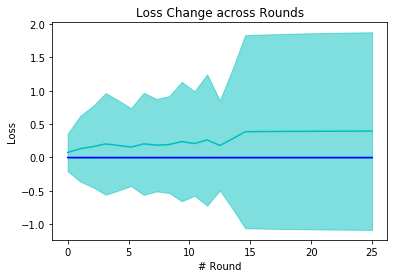

In [34]:
plt.figure()
plotloss(losses.T/10,color= 'b')
plotloss(losses_val.T,color= 'c')
plt.show()

In [35]:
# Baseline
with open(f'produced/baseline_accuracy.p', 'rb') as f:
    baseline_accuracy = pickle.load(f)

In [36]:
# CNN
with open(f'produced/CNN_accuracy.p', 'rb') as f:
    CNN_accuracy = pickle.load(f)

In [37]:
# Regression
with open(f'produced/Regression_accuracy.p', 'rb') as f:
    Regression_accuracy = pickle.load(f)

In [38]:
# Digit 
with open(f'produced/digit_accuracy.p', 'rb') as f:
    digit_accuracy = pickle.load(f)

In [39]:
to_plot = [baseline_accuracy,CNN_accuracy,Regression_accuracy,digit_accuracy]
labels = ["Baseline","CNN","Regression","Digit Classification"]

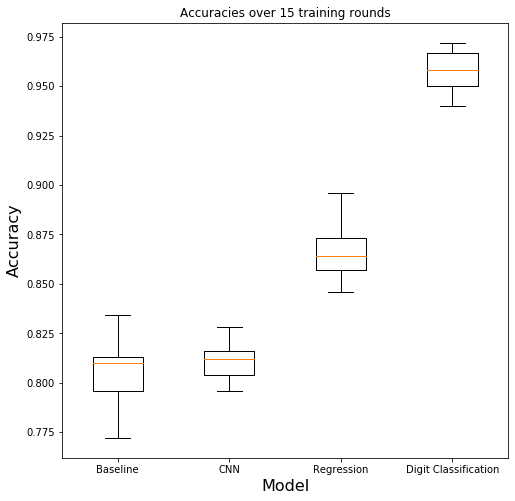

In [40]:
fig = plt.figure(figsize=(8,8))
plt.boxplot(to_plot,labels = labels)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.title("Accuracies over 15 training rounds")
plt.show()
fig.savefig('Plots/Accuracies.png', bbox_inches='tight')